## Import libraries & data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import Normalizer

In [2]:
file = 'nhek'

In [3]:
data = pd.read_csv(file +".csv")

In [4]:
features = data.iloc[:,0:-1].apply(pd.to_numeric,errors='coerce')

In [5]:
features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,133.75,330.32,158.99,131.81,356.89,109.52,272.16,291.63,225.40,48.63,253.39,46.73,213.38
1,241.14,298.76,93.50,298.51,200.29,481.26,402.34,431.68,451.37,641.88,579.43,137.95,341.83
2,445.57,311.35,215.01,229.64,484.50,106.98,134.00,309.13,347.29,82.53,372.39,91.39,184.27
3,586.64,272.19,148.33,240.35,104.86,306.75,220.14,456.49,392.12,223.88,364.60,93.64,169.59
4,572.25,282.97,225.07,518.44,157.87,177.15,359.00,682.67,709.45,272.43,1012.60,117.21,119.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,74.28,202.91,75.60,41.50,151.73,79.92,28.28,34.42,67.17,32.07,53.40,199.67,109.52
9666,100.66,216.55,81.60,32.33,218.17,59.42,36.67,50.67,89.71,36.51,65.78,257.43,134.24
9667,136.60,210.09,105.64,32.70,156.12,76.70,46.10,56.67,113.44,39.89,48.84,274.07,120.59
9668,210.94,503.69,151.61,520.96,101.77,321.75,394.72,484.63,471.94,471.11,621.01,302.80,204.59


In [6]:
#sns.clustermap(features, z_score=0)

## Normalize data

In [7]:
array = features.to_numpy()
normalized_features = stats.zscore(array, axis = 1)

print(np.any(np.isnan(normalized_features)))
print(np.where(np.isnan(normalized_features)))

False
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
normalized_features = np.nan_to_num(normalized_features)

In [8]:
#normalized_features = Normalizer().fit_transform(features)
normalized_features = pd.DataFrame(normalized_features) 
normalized_features.columns = ['CTCF','DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 
normalized_features

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,-0.656415,1.355228,-0.398115,-0.676268,1.627138,-0.904378,0.760035,0.959286,0.281506,-1.527509,0.567948,-1.546953,0.158497
1,-0.712874,-0.348409,-1.646745,-0.349990,-0.971263,0.805963,0.306769,0.492354,0.616899,1.821937,1.426920,-1.365584,-0.075977
2,1.473205,0.436012,-0.308460,-0.195406,1.774038,-1.143268,-0.934469,0.418857,0.713741,-1.332206,0.907702,-1.263740,-0.546005
3,2.250872,-0.022866,-0.918478,-0.253096,-1.232803,0.227032,-0.399232,1.309778,0.844329,-0.372188,0.645336,-1.313933,-0.764751
4,0.644229,-0.440997,-0.658207,0.442362,-0.910306,-0.837978,-0.155773,1.058466,1.158930,-0.480537,2.296189,-1.062841,-1.053537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,-0.244491,1.967460,-0.221792,-0.808183,1.087357,-0.147504,-1.035517,-0.929932,-0.366756,-0.970344,-0.603548,1.911745,0.361504
9666,-0.073896,1.490598,-0.331203,-0.996339,1.512468,-0.630629,-0.937749,-0.748752,-0.221719,-0.939909,-0.544770,2.042471,0.379428
9667,0.397332,1.456627,-0.048930,-1.100298,0.678696,-0.466076,-0.907149,-0.754791,0.063500,-0.996661,-0.867654,2.378844,0.166561
9668,-0.994718,0.880015,-1.374660,0.990610,-1.693829,-0.285105,0.182185,0.757957,0.676692,0.671377,1.631317,-0.406459,-1.035383


## Overview

In [9]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(features)

array([[1.        , 0.81289376, 0.92456618, ..., 0.75618526, 0.83344573,
        0.52276986],
       [0.81289376, 1.        , 0.78181068, ..., 0.63072994, 0.94774814,
        0.65007184],
       [0.92456618, 0.78181068, 1.        , ..., 0.77488149, 0.80339483,
        0.66239744],
       ...,
       [0.75618526, 0.63072994, 0.77488149, ..., 1.        , 0.69397738,
        0.69943592],
       [0.83344573, 0.94774814, 0.80339483, ..., 0.69397738, 1.        ,
        0.58848789],
       [0.52276986, 0.65007184, 0.66239744, ..., 0.69943592, 0.58848789,
        1.        ]])

## Elbow

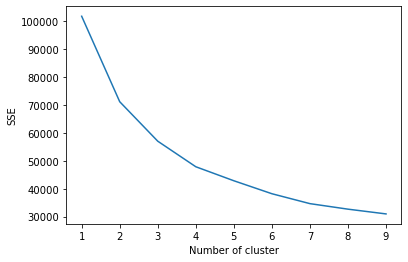

In [10]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_features)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Silhouette coefficient

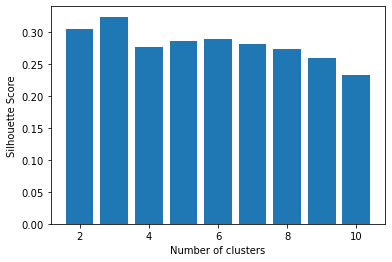

In [11]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Overview of K-Mean clusters

In [12]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [13]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=3, random_state=12)

In [14]:
# Inertia
kmeans.inertia_

56983.3281371029

In [15]:
# Clusters' center
kmeans.cluster_centers_

array([[ 0.21969467,  0.99224233, -0.53976302, -0.41482395, -0.86124559,
         2.03527745, -0.28897393, -0.62637974, -0.50445236,  0.61364812,
        -0.40766144, -0.51592601,  0.29836347],
       [ 1.28541083,  1.28367616,  0.38887737, -0.8421452 ,  0.71269479,
        -0.36081941, -0.4854541 , -0.50499797, -0.32709476, -1.08472358,
        -0.55088791,  0.32474819,  0.16071561],
       [-0.07716004,  0.42772765, -0.31038393,  0.5615133 , -1.09397548,
        -0.2568179 , -0.23363639,  0.63991881,  0.91448975,  0.27219753,
         1.09225309, -1.13387354, -0.80225286]])

In [16]:
# Number of iteration
kmeans.n_iter_

6

## Visualization

In [17]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((normalized_features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

In [18]:
labeled.sort_values('labels')

,CTCF,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1,labels
9669,2.697445,0.372485,-0.762954,-0.743424,-0.596284,1.388340,-0.858844,-0.836009,-0.571733,0.271916,-0.557182,0.088679,0.107565,0
3811,0.669914,0.384319,-0.786873,-1.008182,-0.509874,-0.125732,-0.497889,-0.792563,-0.662296,2.191714,-0.652611,-0.187960,1.978032,0
3810,0.999491,0.662708,-0.311915,-0.539295,-0.953248,2.648634,-0.633772,-0.901325,-0.595346,-0.961505,-0.195049,-0.064687,0.845311,0
7887,-0.238889,0.355149,-0.514312,-0.378067,-0.749918,2.728733,-0.738039,-0.783063,-0.640658,1.493507,-0.508446,-0.427271,0.401273,0
7885,-0.399845,0.313560,-0.510816,-0.458765,-0.680623,3.120264,-0.526042,-0.782408,-0.405224,0.520192,-0.381640,-0.444449,0.635797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,-0.733087,-0.236214,-0.344301,0.487344,-0.862870,-0.684131,-0.817679,0.326366,1.439273,0.989276,2.295649,-0.846851,-1.012775,2
7899,-0.150914,-0.286538,-0.770348,0.742706,-1.157147,-0.914454,-0.526937,0.582686,1.635848,0.819741,1.928504,-1.151054,-0.752093,2
3864,-0.263883,0.426983,1.533217,1.710178,-1.382750,-0.269138,1.437005,0.047391,-0.487838,-1.404984,-0.086821,-0.177777,-1.081582,2
3841,-0.591260,-0.147870,-0.663482,1.010960,-1.507806,1.324190,-0.424071,0.450020,1.295381,-0.167981,1.601508,-1.324976,-0.854612,2


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


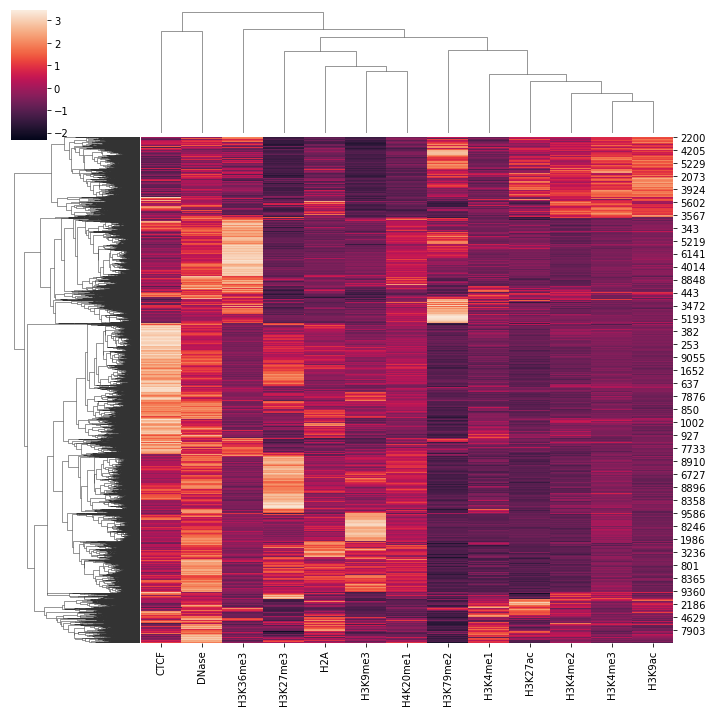

In [19]:
sns.clustermap(labeled.sort_values('labels').iloc[:,0:-1])

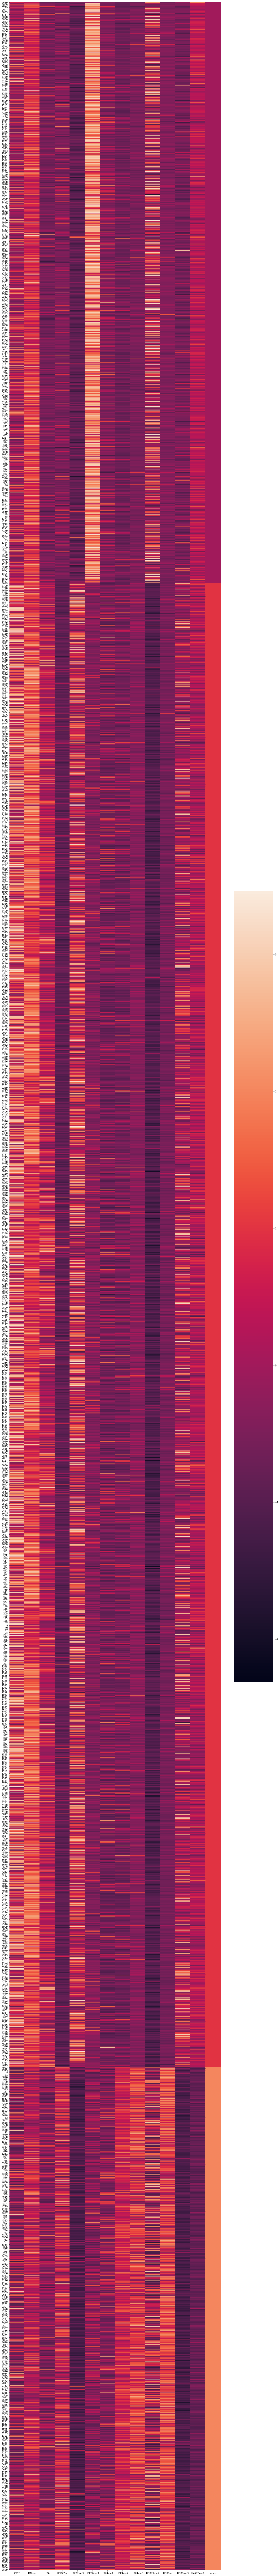

In [20]:
fig, ax = plt.subplots(figsize=(20,200))   
sns.heatmap(labeled.sort_values('labels'))

## Save data

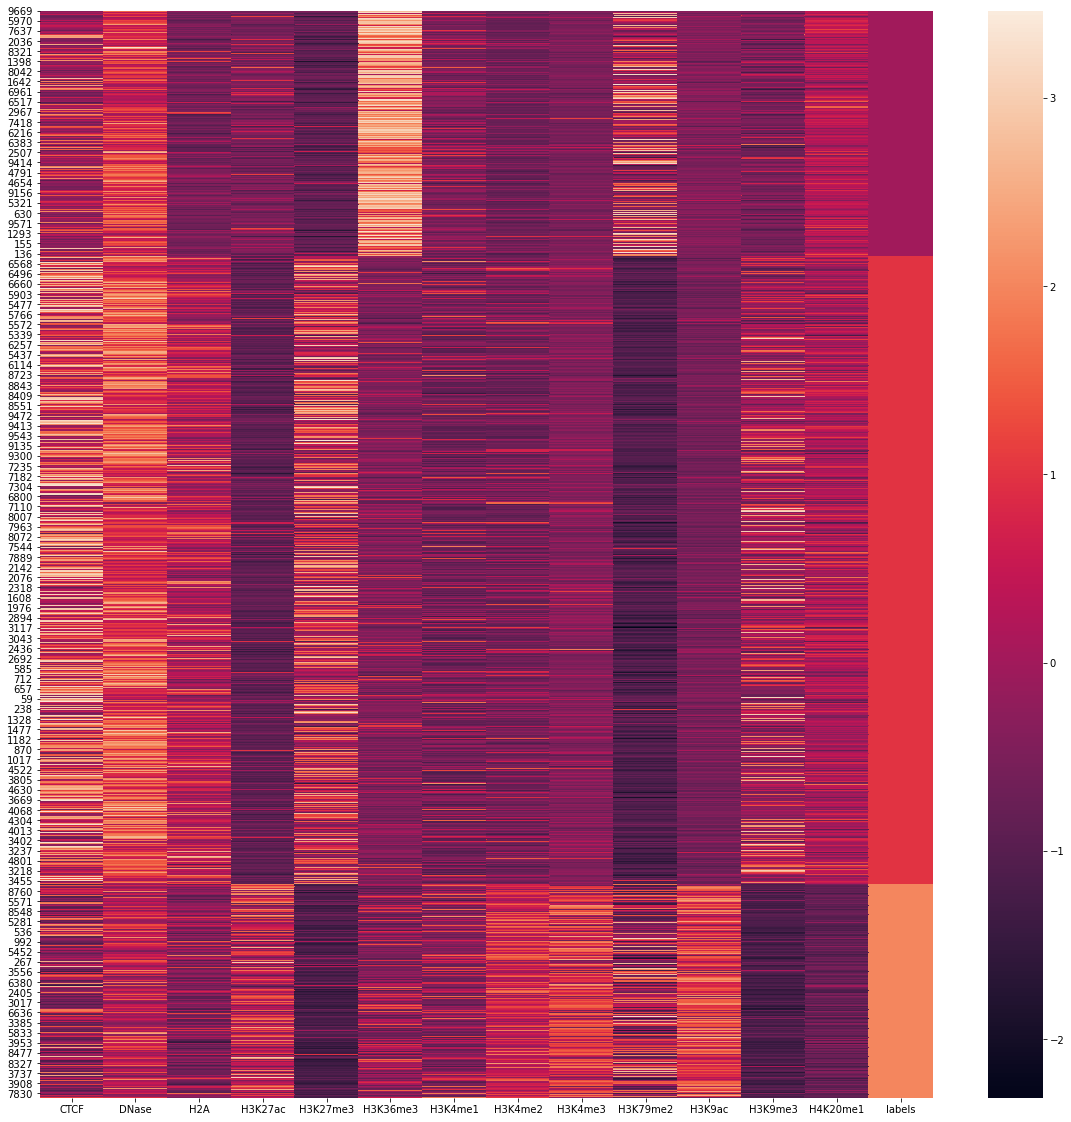

In [21]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(labeled.sort_values('labels'))
plt.savefig(file +".png")

In [22]:
file_labeled = pd.concat((data,labels),axis=1)
file_labeled = file_labeled.rename({0:'labels'},axis=1)
file_labeled.to_csv(file+'_labeled.csv')

## More Visualization

In [ ]:
sns.pairplot(labeled,hue='labels')

In [ ]:
labeled['Constant'] = "Data"

In [ ]:
f, axes = plt.subplots(4, 4, figsize=(20, 25), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.7) 
for i in range(0,len(list(labeled))-2): 
    col = labeled.columns[i]
    if i < 4:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 4 and i<8:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[1,(i-4)]) 
        ax.set_title(col)
    elif i >= 8 and i<12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[2,(i-8)])
        ax.set_title(col)
    elif i >= 12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[3,(i-12)])
        ax.set_title(col)